# **03. 언어 모델(Language Model)**
언어 모델(Languagel Model)이란 단어 시퀀스(문장)에 확률을 할당하는 모델을 말합니다. 어떤 문장들이 있을 때, 기계가 이 문장은 적절해! 이 문장은 말이 안 돼! 라고 사람처럼 정확히 판단할 수 있다면, 기계의 자연어 처리의 성능이 뛰어나다 할 수 있습니다.

이번 챕터에서는 통계에 기반한 전통적인 언어 모델(Statistical Languagel Model, SLM)에 대해서 학습합니다. 통계에 기반한 언어 모델은 우리가 실제 사용하는 자연어를 근사하기에는 많은 한계가 있었고, 요즘 들어 인공 신경망이 그러한 한계를 많이 해결해주면서 통계 기반 언어 모델은 많이 사용 용도가 줄었습니다. 하지만 그럼에도 통계 기반 방법론에 대한 이해는 언어 모델에 대한 전체적인 시야를 갖는 일에 도움이 됩니다.

## **03-01 언어 모델(Language Model)이란?**
---

**언어 모델(Language Model, LM)** 은 언어라는 현상을 모델링하고자 **단어 시퀀스(문장)에 확률을 할당(assign)하는 모델** 입니다.

언어 모델을 만드는 방법은 크게는 **통계를 이용한 방법**과 **인공 신경망**을 이용한 방법으로 구분할 수 있습니다. 최근에는 통계를 이용한 방법보다는 인공 신경망을 이용한 방법이 더 좋은 성능을 보여주고 있습니다. 최근 핫한 자연어 처리의 기술인 GPT나 BERT 또한 인공 신경망 언어 모델의 개념을 사용하여 만들어졌습니다. 이번 챕터에서는 언어 모델의 개념과 언어 모델의 전통적 접근 방식인 통계적 언어 모델에 대해서 배웁니다.

마지막 편집일시 : 2022년 12월 15일 7:09 오전

---
### **1. 언어 모델(Language Model)**

언어 모델은 **단어 시퀀스에 확률을 할당(assign)** 하는 일을 하는 모델입니다. 이를 조금 풀어서 쓰면, 언어 모델은 가장 자연스러운 단어 시퀀스를 찾아내는 모델입니다. 단어 시퀀스에 확률을 할당하게 하기 위해서 가장 보편적으로 사용되는 방법은 언어 모델이 **이전 단어들이 주어졌을 때 다음 단어를 예측**하도록 하는 것입니다.

다른 유형의 언어 모델로는 **주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 언어 모델** 이 있습니다. 이는 문장의 가운데에 있는 단어를 비워놓고 양쪽의 문맥을 통해서 빈 칸의 단어인지 맞추는 고등학교 수험 시험의 빈칸 추론 문제와 비슷합니다. 이 유형의 언어 모델은 BERT 챕터에서 다루게 될 예정이고, 그때까지는 이전 단어들로부터 다음 단어를 예측하는 방식에만 집중합니다.

언어 모델에 -ing를 붙인 **언어 모델링(Language Modeling)** 은 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업을 말합니다. 즉, 언어 모델이 이전 단어들로부터 다음 단어를 예측하는 일은 언어 모델링입니다.

자연어 처리로 유명한 스탠포드 대학교에서는 언어 모델을 문법(grammar)이라고 비유하기도 합니다. 언어 모델이 단어들의 조합이 얼마나 적절한지, 또는 해당 문장이 얼마나 적합한지를 알려주는 일을 하는 것이 마치 문법이 하는 일 같기 때문입니다.

---
### **2. 단어 시퀀스의 확률 할당**

자연어 처리에서 단어 시퀀스에 확률을 할당하는 일이 왜 필요할까요? 예를 들어보겠습니다. 여기서 대문자 P는 확률을 의미합니다.

#### **a. 기계 번역(Machine Translation):**
```yaml
    P(나는 버스를 탔다) > P(나는 버스를 태운다)
```
: 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단합니다.

#### **b. 오타 교정(Spell Correction)**
```yaml
    선생님이 교실로 부리나케  
    P(달려갔다) > P(잘려갔다)  
```
: 언어 모델은 두 문장을 비교하여 좌측의 문장의 **확률** 이 더 높다고 판단합니다.


#### **c. 음성 인식(Speech Recognition)**
```yaml
    P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)
    : 언어 모델은 두 문장을 비교하여 우측의 문장의 확률이 더 높다고 판단합니다.
```
언어 모델은 위와 같이 확률을 통해 보다 적절한 문장을 판단합니다.

---
### **3. 주어진 이전 단어들로부터 다음 단어 예측하기**

언어 모델은 단어 시퀀스에 확률을 할당하는 모델입니다. 그리고 단어 시퀀스에 확률을 할당하기 위해서 가장 보편적으로 사용하는 방법은 **이전 단어들이 주어졌을 때, 다음 단어를 예측** 하도록 하는 것입니다. 이를 **조건부 확률** 로 표현해보겠습니다.

#### **A. 단어 시퀀스의 확률**
하나의 단어를 $w$, 단어 시퀀스를 대문자 $W$라고 한다면, $n$개의 단어가 등장하는 단어 시퀀스 $W$의 확률은 다음과 같습니다.  
  
  $$P(W) = P(w_1, w_2, w_3, w_4, w_5, ... , w_n)$$



#### **B. 다음 단어 등장 확률**
다음 단어 등장 확률을 식으로 표현해보겠습니다. $n$-1개의 단어가 나열된 상태에서 $n$번째 단어의 확률은 다음과 같습니다.

$$P(w_n | w_1, ..., w_{n-1})$$

`|`의 기호는 **조건부 확률(conditional probability)** 을 의미합니다.  
  
예를 들어 다섯번째 단어의 확률은 아래와 같습니다.  
  
$$P(w_5 | w_1, w_2, w_3, w_4)$$

전체 **단어 시퀀스 $W$의 확률** 은 모든 단어가 예측되고 나서야 알 수 있으므로 단어 시퀀스의 확률은 다음과 같습니다.  
  
$$P(W) = P(w_1, w_2, w_3, w_4, w_5, ... w_n) = \prod_{i=1}^{n}P(w_{i} | w_{1}, ... , w_{i-1})$$

---
### **4. 언어 모델의 간단한 직관**

`비행기를 타려고 공항에 갔는데 지각을 하는 바람에 비행기를 [?]`라는 문장이 있습니다. **'비행기를'** 다음에 어떤 단어가 오게 될지 사람은 쉽게 **'놓쳤다'** 라고 예상할 수 있습니다. 우리 지식에 기반하여 나올 수 있는 여러 단어들을 후보에 놓고 놓쳤다는 단어가 나올 **확률** 이 가장 높다고 판단하였기 때문입니다.

그렇다면 기계에게 위 문장을 주고, '비행기를' 다음에 나올 단어를 예측해보라고 한다면 과연 어떻게 최대한 정확히 예측할 수 있을까요? 기계도 비슷합니다. **앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 확률을 예측해보고 가장 높은 확률을 가진 단어를 선택** 합니다. 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 등장 확률을 추정하고 가장 높은 확률을 가진 단어를 선택합니다.

---
### **5. 검색 엔진에서의 언어 모델의 예**


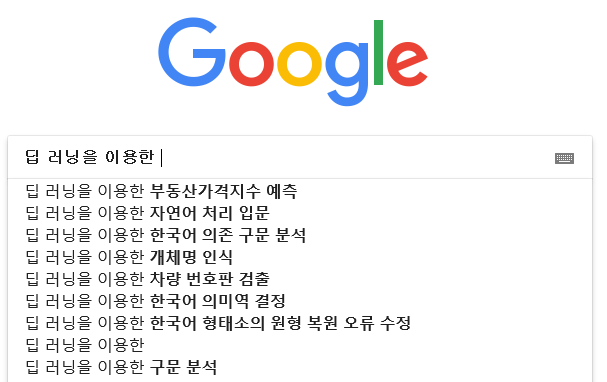

검색 엔진이 입력된 단어들의 나열에 대해서 다음 단어를 예측하는 언어 모델을 사용하고 있습니다.

마지막 편집일시 : 2023년 1월 2일 6:02 오후